# Implementation of Spectrum Sensing using K Nearest Neighbour Algorithm
## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Extracting the training data
### Importing the dataset and seperating it into inputs and target

In [2]:
df_train = pd.read_csv("train_samples_new.csv")
df_train.head()

,I/Q signal,Modulation_type,SNR,Amplitude,Primary_User_Presence
0,-0.91383-1.3532i,50,0,1.632861,No
1,0.47213+1.7098i,30,-2,1.773788,No
2,-0.5656-0.98212i,11,14,1.133342,Yes
3,0.018993-0.91356i,20,18,0.913757,Yes
4,0.83479-1.3865i,24,12,1.618412,Yes


In [3]:
encoder = LabelEncoder()   #LabelEncoder function is used to convert script data to numerical value
df_train['Primary_user_presence_n'] = encoder.fit_transform(df_train['Primary_User_Presence'])

df_train.head()

,I/Q signal,Modulation_type,SNR,Amplitude,Primary_User_Presence,Primary_user_presence_n
0,-0.91383-1.3532i,50,0,1.632861,No,0
1,0.47213+1.7098i,30,-2,1.773788,No,0
2,-0.5656-0.98212i,11,14,1.133342,Yes,1
3,0.018993-0.91356i,20,18,0.913757,Yes,1
4,0.83479-1.3865i,24,12,1.618412,Yes,1


In [4]:
inputs_train = df_train.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
inputs_train.head()

,Modulation_type,SNR,Amplitude
0,50,0,1.632861
1,30,-2,1.773788
2,11,14,1.133342
3,20,18,0.913757
4,24,12,1.618412


In [5]:
target_train = df_train['Primary_user_presence_n'] 
target_train.head()

0    0
1    0
2    1
3    1
4    1
Name: Primary_user_presence_n, dtype: int32

## Extracting the testing data
### Importing the dataset and seperating it into inputs and target

In [6]:
df_test = pd.read_csv("test_samples_new.csv")
df_test.head()

,I/Q signal,Modulation_type,SNR,Amplitude,Primary_User_Presence
0,0.099661+0.29101i,61,18,0.307602,Yes
1,-0.44902-0.58142i,13,12,0.734621,Yes
2,1.0156-0.32622i,44,-2,1.066707,No
3,-0.0051797+0.10542i,0,12,0.105547,Yes
4,-0.093558-0.060805i,21,6,0.111581,No


In [7]:
df_test['Primary_user_presence_n'] = encoder.fit_transform(df_test['Primary_User_Presence'])

df_test.head()

,I/Q signal,Modulation_type,SNR,Amplitude,Primary_User_Presence,Primary_user_presence_n
0,0.099661+0.29101i,61,18,0.307602,Yes,1
1,-0.44902-0.58142i,13,12,0.734621,Yes,1
2,1.0156-0.32622i,44,-2,1.066707,No,0
3,-0.0051797+0.10542i,0,12,0.105547,Yes,1
4,-0.093558-0.060805i,21,6,0.111581,No,0


In [8]:
inputs_test = df_test.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
inputs_test.head()

,Modulation_type,SNR,Amplitude
0,61,18,0.307602
1,13,12,0.734621
2,44,-2,1.066707
3,0,12,0.105547
4,21,6,0.111581


In [9]:
target_test = df_test['Primary_user_presence_n']   #Target dataset containing presence of user
target_test.head()

0    1
1    1
2    0
3    1
4    0
Name: Primary_user_presence_n, dtype: int32

### Plotting the accuracy graph for different values of K

In [11]:
lst_n=[]
lst_acc=[]
warnings.filterwarnings('ignore')

for i in range (1,451):
    lst_n.append(i)
    classifier = KNeighborsClassifier(n_neighbors=i,weights='uniform', p=1, metric='minkowski')
    classifier.fit(inputs_train,target_train)
    lst_acc.append(classifier.score(inputs_test,target_test)*100)
    print(str(i)+', ', end=' ')

1,  2,  3,  4,  5,  6,  7,  8,  9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,  144,  145,  146,  147,  148,  149,  150,  151,  152,  153,  154,  155,  156,  157,  158,  159,  160,  161,  162,  163,  164,  165,  166,  167,  168,  169,  170,  171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,  182,  183,  184,  185,

<function matplotlib.pyplot.show(close=None, block=None)>

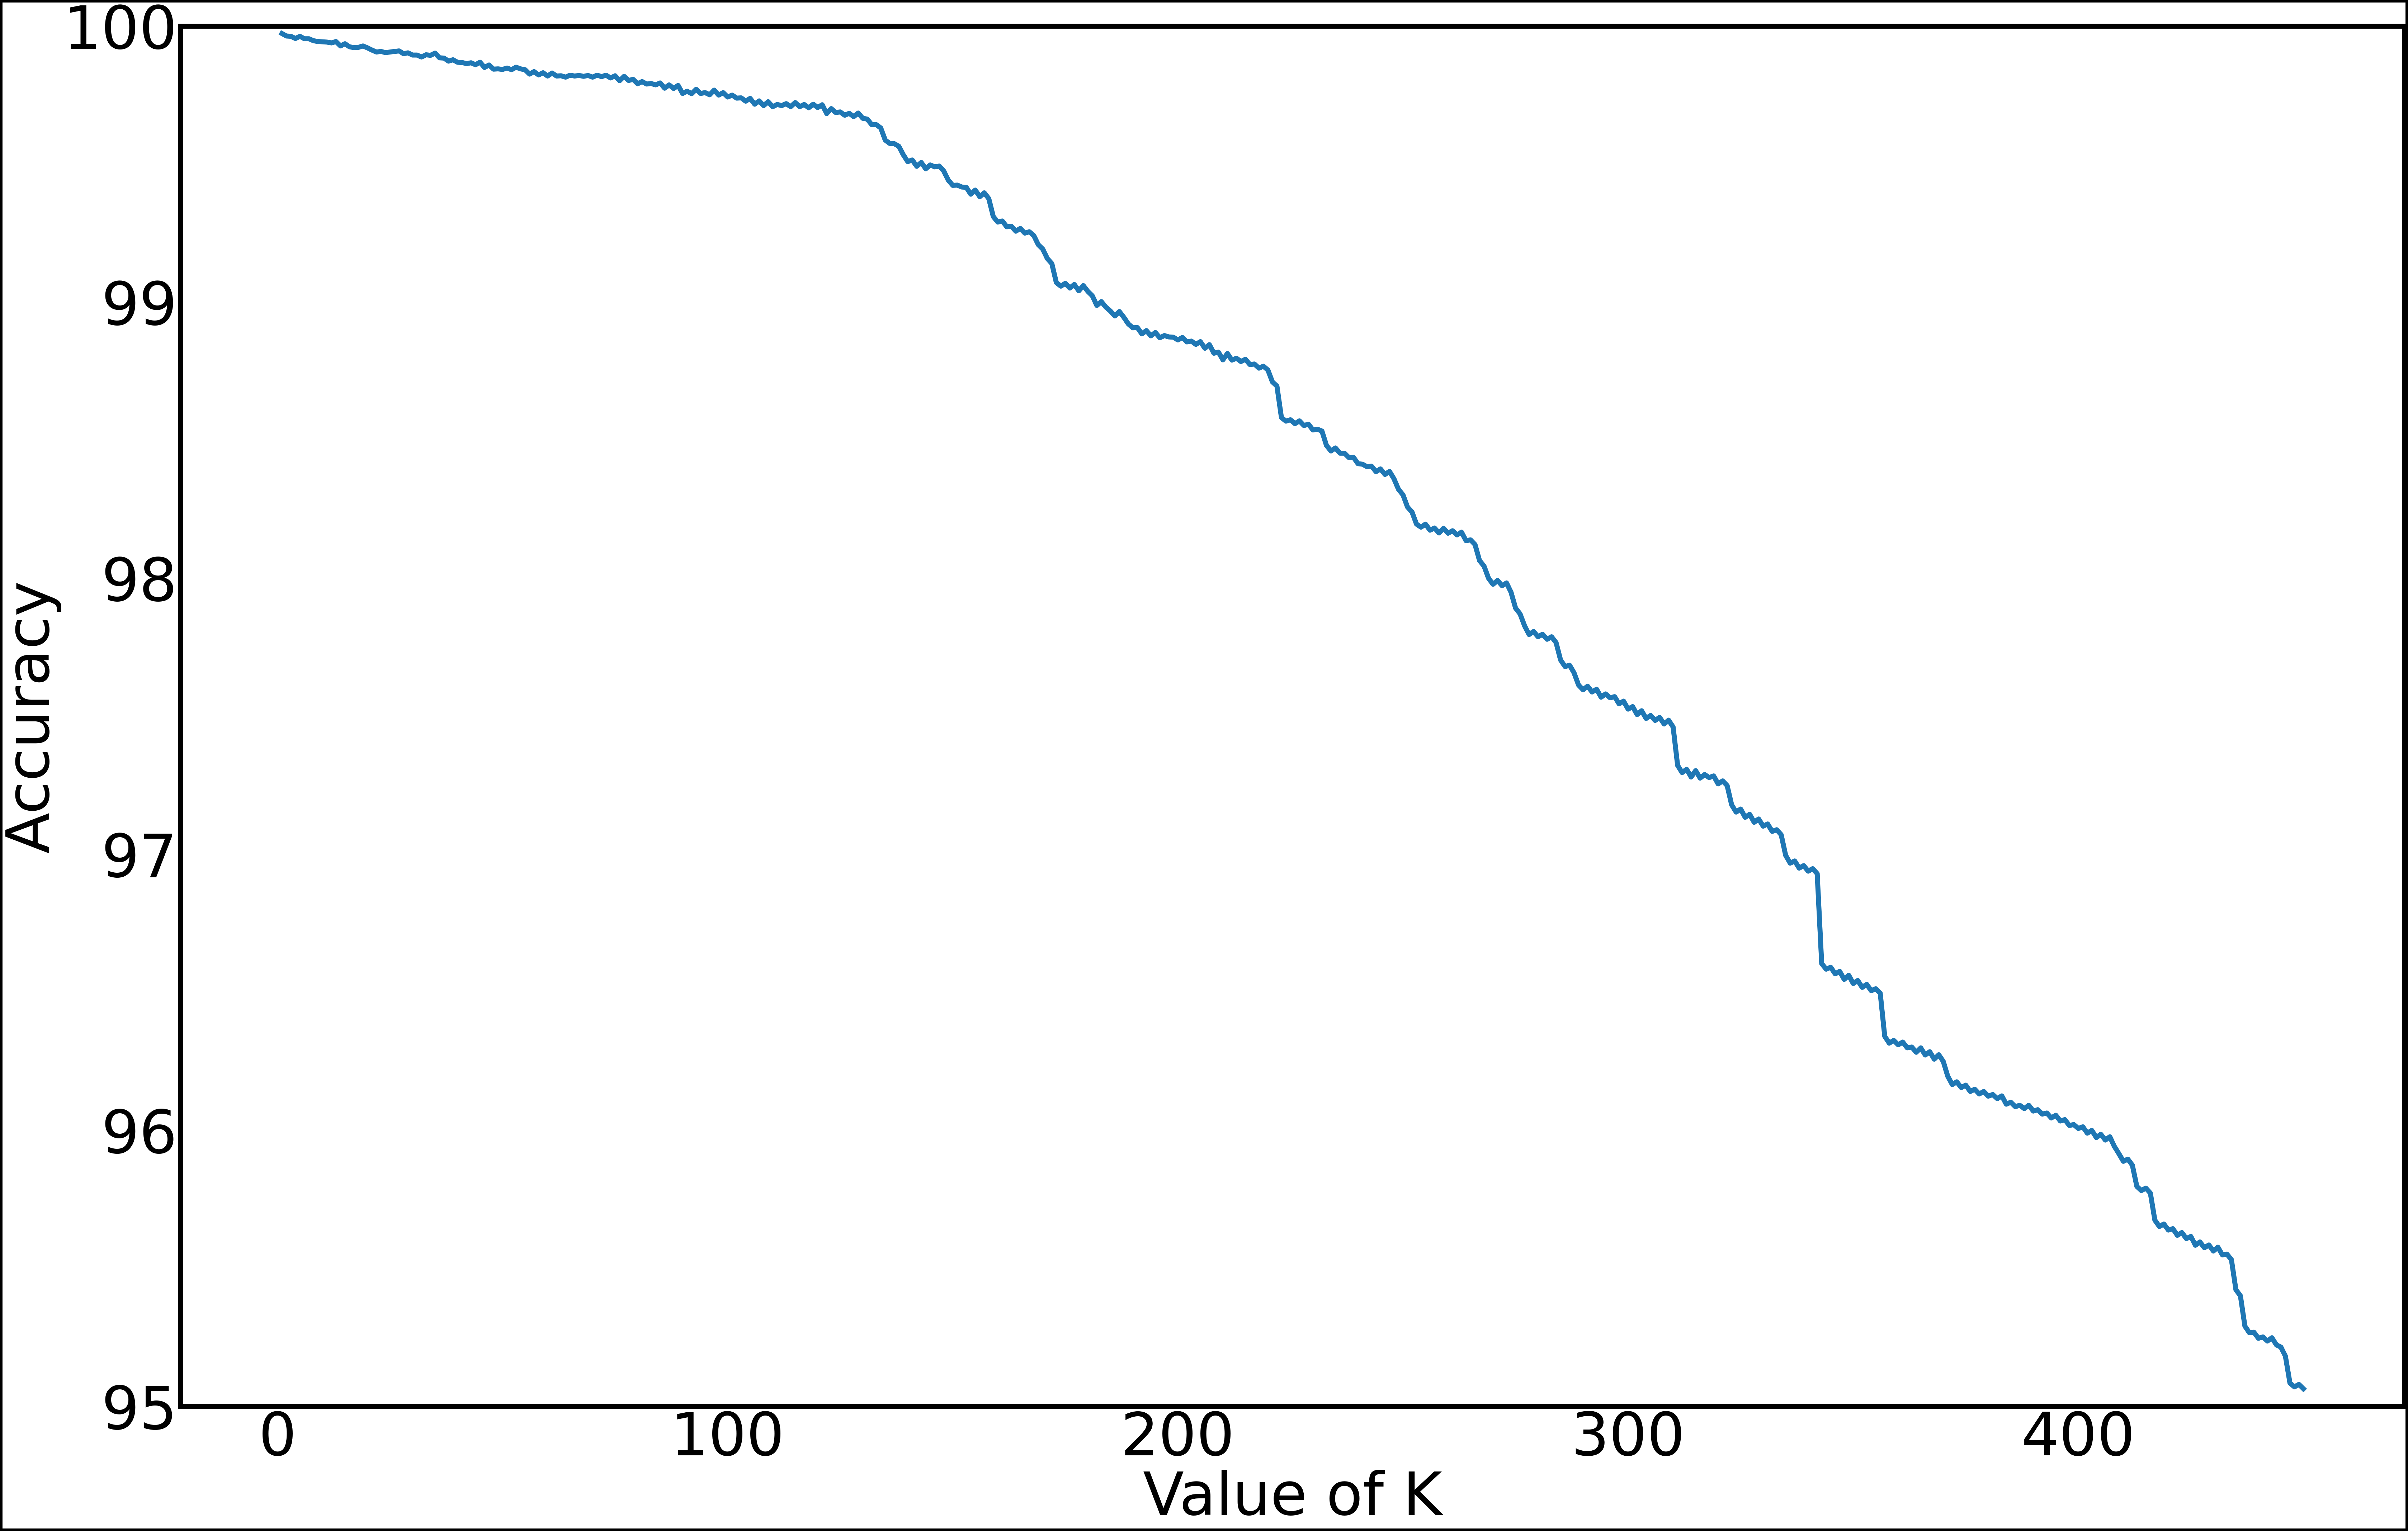

In [19]:
fig, ax = plt.subplots(figsize=(80,50))
plt.ylim(95,100)

ax.spines['right'].set_linewidth(10)
ax.spines['top'].set_linewidth(10)
ax.spines['left'].set_linewidth(10)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(10)
ax.spines['bottom'].set_color('black')

plt.plot(lst_n,lst_acc, linewidth=10)
plt.xlabel('Value of K', fontsize = 120)
plt.ylabel('Accuracy', fontsize = 120)
plt.xticks(fontsize=120)
plt.yticks(fontsize=120)

fig.patch.set_edgecolor('black')
fig.patch.set_linewidth('10')
plt.show

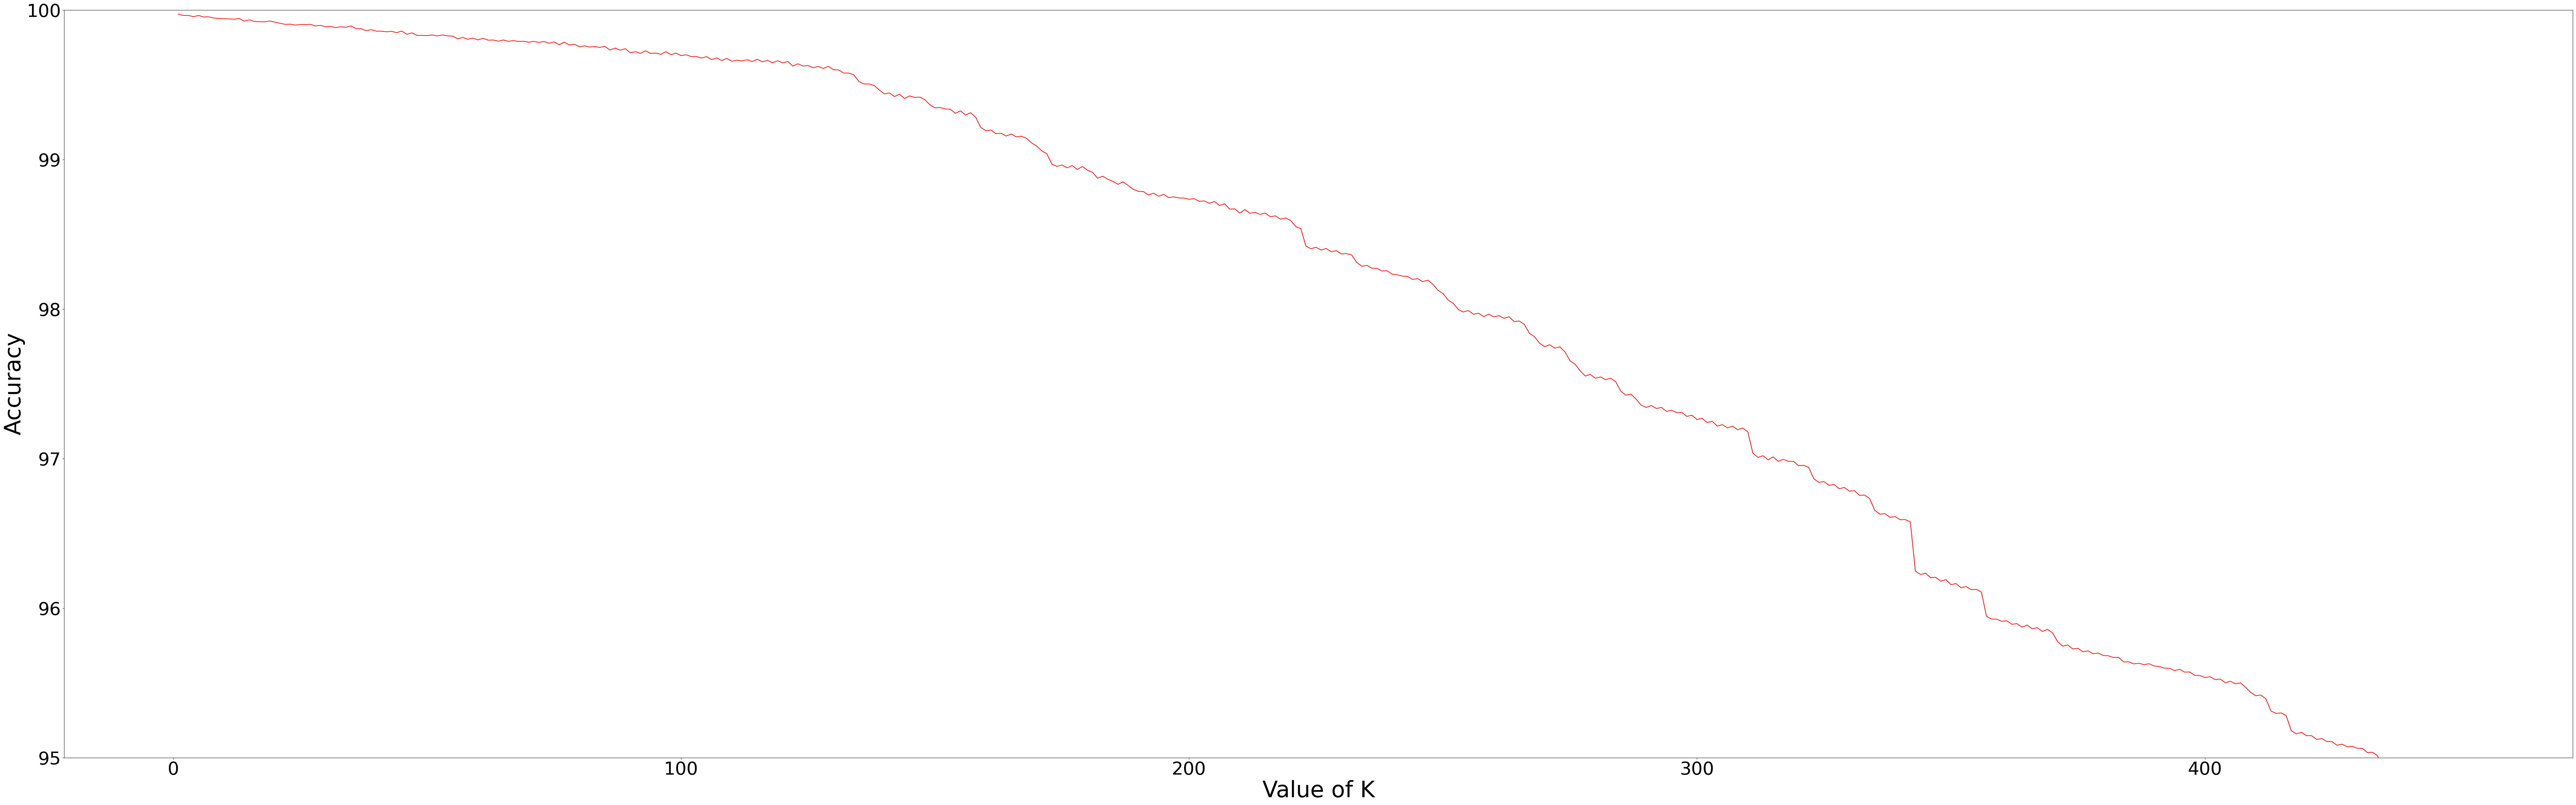

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100,30))
plt.ylim(95,100)

plt.plot(lst_n,lst_acc, color='red')
plt.xlabel('Value of K', fontsize=50)
plt.ylabel('Accuracy', fontsize=50)
plt.tick_params(labelsize=40)
plt.show()

### Feeding the train data into the model and finding its training accuracy

In [10]:
classifier = KNeighborsClassifier(n_neighbors=447,weights='uniform', p=1, metric='minkowski')
classifier.fit(inputs_train,target_train)

KNeighborsClassifier(n_neighbors=447, p=1)

In [11]:
classifier.score(inputs_train,target_train)*100

95.25200000000001

### Finding the testing accuracy of the model

In [12]:
classifier.score(inputs_test,target_test)*100

95.085

### Finding out number of misclassified samples

In [13]:
target_pred = classifier.predict(inputs_test)

misclassified = np.where(target_test!=target_pred)
len(misclassified[0])

4915

### Confusion Matrix

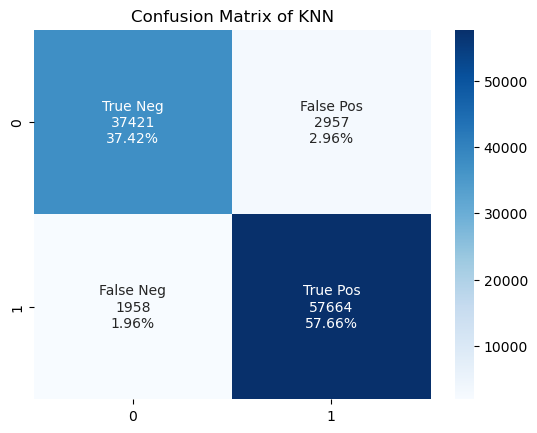

In [14]:
cf_KNN = confusion_matrix(target_test, target_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_KNN.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_KNN.flatten()/np.sum(cf_KNN)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a= sns.heatmap(cf_KNN, annot=labels, fmt='', cmap='Blues')
a.set_title("Confusion Matrix of KNN")
plt.show()

In [15]:
TP=cf_KNN[1][1] 
TN=cf_KNN[0][0]
FP=cf_KNN[0][1]
FN=cf_KNN[1][0]
N=TP+TN+FP+FN

### Obatining the Probability of Detection

In [16]:
PD = TP/(FN+TP)
print("The probablity of detection of the model is "+ str(PD*100) + '%')

The probablity of detection of the model is 96.71597732380664%


### Obtaining the Probablilty of False Alarm

In [17]:
PF = FP/(FP+TN)
print("The probablity of false alarm of the model is "+ str(PF*100) + '%')

The probablity of false alarm of the model is 7.323294863539551%


### Plotting the graph for Probability of Detection at different values of SNR

In [18]:
df_sn4 = df_test[df_test['SNR'] == -4]
df_sn2 = df_test[df_test['SNR'] == -2]
df_s0 = df_test[df_test['SNR'] == 0]
df_s2 = df_test[df_test['SNR'] == 2]
df_s4 = df_test[df_test['SNR'] == 4]
df_s6 = df_test[df_test['SNR'] == 6]
df_s8 = df_test[df_test['SNR'] == 8]
df_s10 = df_test[df_test['SNR'] == 10]
df_s12 = df_test[df_test['SNR'] == 12]
df_s14 = df_test[df_test['SNR'] == 14]
df_s16 = df_test[df_test['SNR'] == 16]
df_s18 = df_test[df_test['SNR'] == 18]

In [19]:
inputs_test_sn4 = df_sn4.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_sn4 = df_sn4['Primary_user_presence_n']  

inputs_test_sn2 = df_sn2.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_sn2 = df_sn2['Primary_user_presence_n'] 

inputs_test_s0 = df_s0.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_s0 = df_s0['Primary_user_presence_n'] 

inputs_test_s2 = df_s2.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_s2 = df_s2['Primary_user_presence_n'] 

inputs_test_s4 = df_s4.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_s4 = df_s4['Primary_user_presence_n'] 

inputs_test_s6 = df_s6.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_s6 = df_s6['Primary_user_presence_n'] 

inputs_test_s8 = df_s8.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_s8 = df_s8['Primary_user_presence_n'] 

inputs_test_s10 = df_s10.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_s10 = df_s10['Primary_user_presence_n'] 

inputs_test_s12 = df_s12.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_s12 = df_s12['Primary_user_presence_n'] 

inputs_test_s14 = df_s14.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_s14 = df_s14['Primary_user_presence_n'] 

inputs_test_s16 = df_s16.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_s16 = df_s16['Primary_user_presence_n'] 

inputs_test_s18 = df_s18.drop(['I/Q signal','Primary_User_Presence','Primary_user_presence_n'],axis='columns') 
target_test_s18 = df_s18['Primary_user_presence_n'] 

In [20]:
lst_ip_tests = [inputs_test_sn4, inputs_test_sn2, inputs_test_s0, inputs_test_s2, inputs_test_s4, inputs_test_s6,
                inputs_test_s8, inputs_test_s10, inputs_test_s12, inputs_test_s14, inputs_test_s16, inputs_test_s18]

In [21]:
lst_tg_tests = [target_test_sn4, target_test_sn2, target_test_s0, target_test_s2, target_test_s4, target_test_s6,
                target_test_s8, target_test_s10, target_test_s12, target_test_s14, target_test_s16, target_test_s18]

In [22]:
lst_PD = []
for i in range (12):
    target_pred_new = classifier.predict(lst_ip_tests[i])
    cf_DT = confusion_matrix(lst_tg_tests[i], target_pred_new)
    TPn=cf_DT[1][1] 
    TNn=cf_DT[0][0]
    FPn=cf_DT[0][1]
    FNn=cf_DT[1][0]
    PDn = TPn/(FNn+TPn)
    lst_PD.append(PDn)

    
print(lst_PD)

[0.876280834914611, 0.8884547069271759, 0.896814404432133, 0.8865979381443299, 0.9350512753089666, 0.9322157434402333, 0.9671592775041051, 0.9981314761338542, 0.9993744135126681, 1.0, 1.0, 1.0]


In [23]:
lst_Pfa_KNN = []

for i in range (12):
    target_pred_new = classifier.predict(lst_ip_tests[i])
    cf_DT = confusion_matrix(lst_tg_tests[i], target_pred_new)
    TPn=cf_DT[1][1] 
    TNn=cf_DT[0][0]
    FPn=cf_DT[0][1]
    FNn=cf_DT[1][0]
    Pfan = FPn/(FPn+TNn)
    lst_Pfa_KNN.append(Pfan)

    
lst_Pfa_KNN

[0.049692712906057944,
 0.05294009891921597,
 0.05568917668825162,
 0.05994204998189062,
 0.04562653015802359,
 0.08181603215890282,
 0.05861969390701704,
 0.1273938384679434,
 0.1046090108751942,
 0.1600703605980651,
 0.38333333333333336,
 1.0]

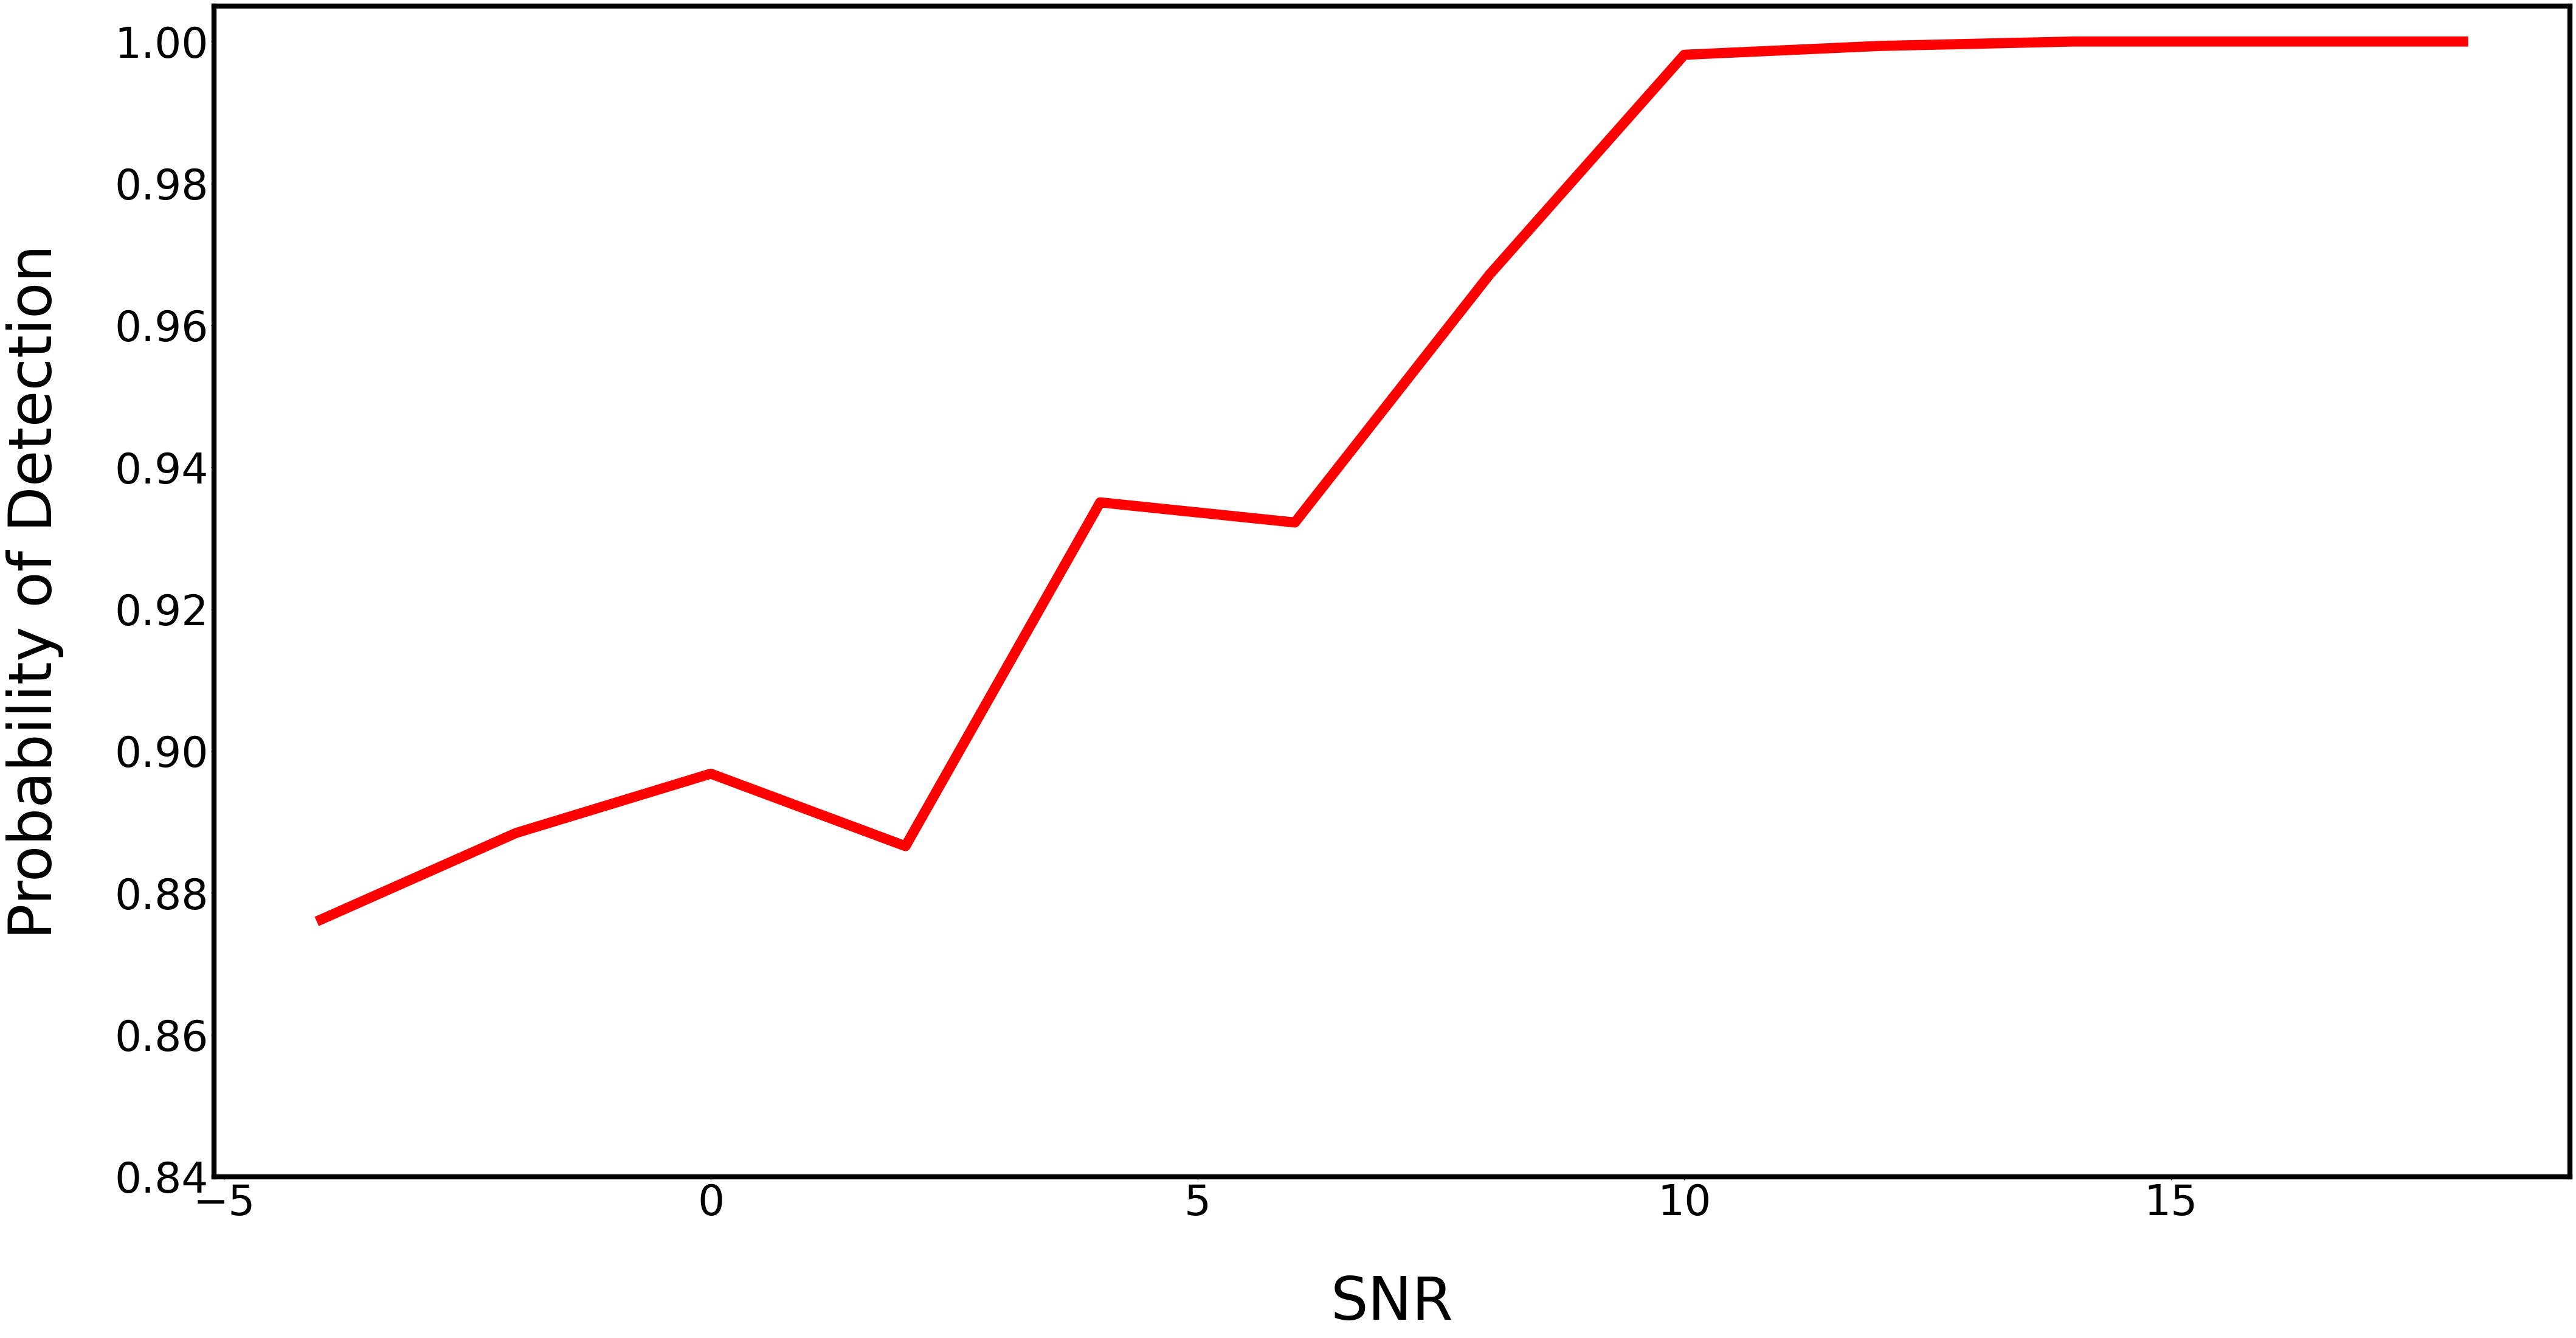

In [33]:
lst_snr = [-4,-2,0,2,4,6,8,10,12,14,16,18]
fig, ax = plt.subplots(figsize=(50, 25))
ax.plot(lst_snr, lst_PD, color='red', linewidth=12)

# Set the plot limits and axis labels
ax.set_ylim(0.84, 1.005)
ax.set_xlabel('SNR', fontsize=70, labelpad=60)
ax.set_ylabel('Probability of Detection', fontsize=70, labelpad=60)
ax.tick_params(labelsize=50)

ax.spines['right'].set_linewidth(6)
ax.spines['top'].set_linewidth(6)
ax.spines['left'].set_linewidth(6)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(6)
ax.spines['bottom'].set_color('black')
plt.show()

### Plotting the graph of Accuracy at different values of SNR

In [34]:
# Creating a list of Accuracy values at different SNR for the plot
lst_Acc = []
for i in range (12):
    a = classifier.score(lst_ip_tests[i],lst_tg_tests[i])
    lst_Acc.append(a)
lst_Acc

[0.926890756302521,
 0.9271211022480058,
 0.9277704087784879,
 0.9220155968806238,
 0.9455159112825458,
 0.9251048532055123,
 0.9564487102579484,
 0.9617565448184341,
 0.9752552552552552,
 0.9783436458829129,
 0.9752481167045318,
 0.9878730234217097]

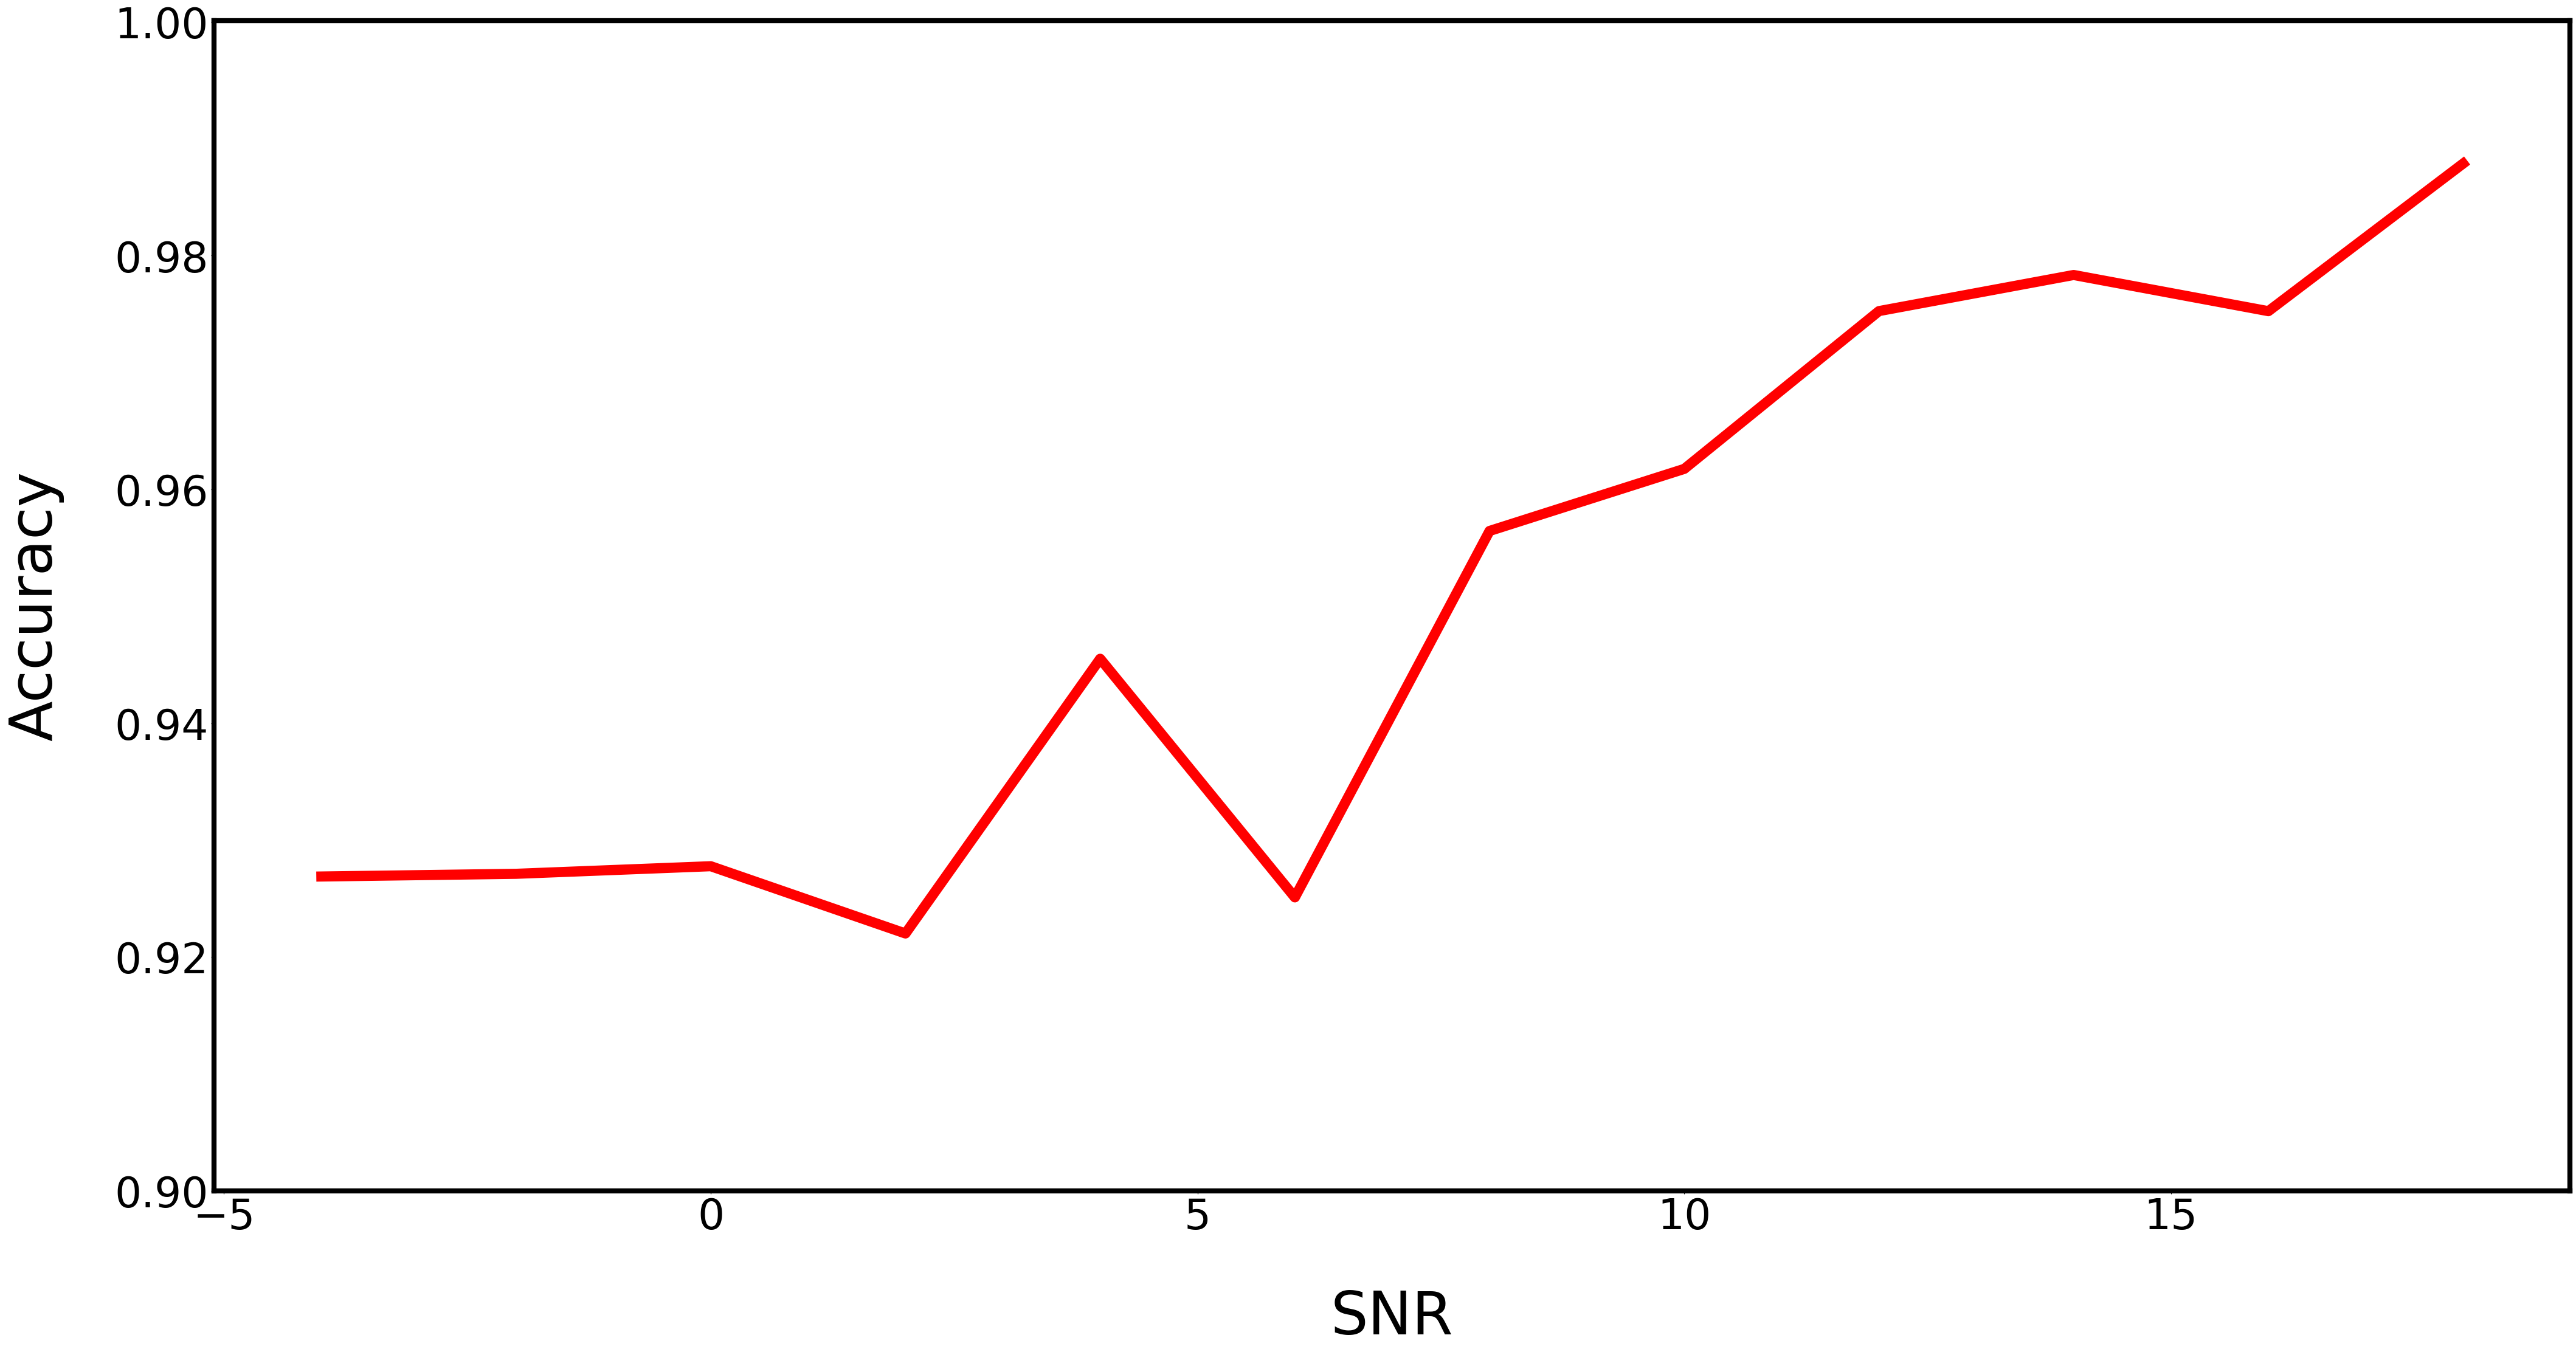

In [37]:
fig, ax = plt.subplots(figsize=(50, 25))
ax.plot(lst_snr, lst_Acc, color='red', linewidth=12)


ax.set_ylim(0.9, 1.0001)
ax.set_xlabel('SNR', fontsize=70, labelpad=60)
ax.set_ylabel('Accuracy', fontsize=70, labelpad=60)
ax.tick_params(labelsize=50)

ax.spines['right'].set_linewidth(6)
ax.spines['top'].set_linewidth(6)
ax.spines['left'].set_linewidth(6)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(6)
ax.spines['bottom'].set_color('black')
plt.show()

### The evaluation paramter values are

<table style="width:50%">
  <tr>
    <th style="font-size:15px; text-align:left">Criteria</th>
    <th style="font-size:15px; text-align:left">Obtained Values</th> 
  </tr>
  <tr>
    <td style="font-size:13px; text-align:left">Accuracy</td>
    <td style="font-size:13px; text-align:left">95.08 %</td>
  </tr>
  <tr>
    <td style="font-size:13px; text-align:left">Probability of Detection</td>
    <td style="font-size:13px; text-align:left">96.71 %</td>
  </tr>
  <tr>
    <td style="font-size:13px; text-align:left">Probability of False Alarm</td>
    <td style="font-size:13px; text-align:left">7.32 %</td>
  </tr>
</table>

### And the number of misclassified samples are 4915